In [ ]:
######## only replay graph special

import numpy as np
list1 = []

attackFree = [None]*4036



def fun(filename):

  file_ = open(filename, 'r')

  state = True

  graphList = []
  ultimateGraphList = [] 
  ultimateTimeList = []
  kamine = 0
  graphCounter = 0
  lineCounter = 0
  while True: 
  
    # Get next line from file 
      line = file_.readline() 
      if not line: 
        break
      list1 = list(line.split())
      lineCounter += 1

      
    # if line is empty 
    # end of file is reached 
      node = list1[2][0:3]

      if lineCounter >= 158334 and lineCounter <= 200000 and node == '1A1':
        state = False
        print(graphCounter)

      #print(node)
      graphList.append(node)
      #graphList.append(str(list1[2][0:3]))
      if len(graphList) == 200:
        ultimateGraphList.append(graphList)
        
        graphList = []

        attackFree[graphCounter] = state
        graphCounter += 1
        state = True
        
  file_.close()
  ultimateGraphList.append(graphList)
  attackFree[graphCounter] = state
  return ultimateGraphList


ugl = fun('/content/replay.log')


print("ugl")
print(len(ugl))





In [ ]:
####### replay attack
from collections import defaultdict
lenugl = len(ugl)
fileW = open("replayattackGraph_opelastra.txt", "w")

for i in range(0,lenugl):
  fileW.write("Graph No: "+str(i+1))
  fileW.write("\n")
  dicGraph = defaultdict(list)
  for j in range (0, len(ugl[i])-1):
    dicGraph[str(ugl[i][j])].append((ugl[i][j+1]))
    #G.add_edge(ugl[i][j],ugl[i][j+1])

  

  fileW.write("Attack Free: "+str(attackFree[i])+"\n")   
  for key, val in dicGraph.items():
    fileW.write(str(key) + (" ---> "))
    # fileW.write("\n")
    for m in range(0, len(val)):
      fileW.write(val[m]+"\t")
    fileW.write("\n")

  
  

fileW.close()

In [52]:
# for all graph

list1 = []






def fun1(filename):

  file_ = open(filename, 'r')


  graphList = []
  ultimateGraphList = [] 
  graphCounter = 0
  
  while True: 
  
    # Get next line from file 
      line = file_.readline() 
      if not line: 
        break
      list1 = list(line.split())
      

      
    # if line is empty 
    # end of file is reached 
      node = list1[2][0:3]


      #print(node)
      graphList.append(node)
      #graphList.append(str(list1[2][0:3]))
      if len(graphList) == 200: #we take 200 messages so here 200
        ultimateGraphList.append(graphList)
        
        graphList = []
  file_.close()
  ultimateGraphList.append(graphList)
  return ultimateGraphList


ugl = fun1('/content/fuzzing_canid.log')

print(len(ugl))
print(ugl[1][6])

4036
1C3


In [53]:
list2 = []
 

def fun2(filename):

  file_ = open(filename, 'r')



  timeList = []
  ultimateTimeList = []

  graphCounter = 0
  while True: 
  
    # Get next line from file 
      line = file_.readline() 
      if not line: 
        break
      list2 = list(line.split())
    # if line is empty 
    # end of file is reached 
      time = list2[0][1:18]
      #print(node)
      timeList.append(time)
      #graphList.append(str(list1[2][0:3]))
      if len(timeList) == 200:
        ultimateTimeList.append(timeList)
        
        timeList = []
     
    

    

  
  file_.close()
  ultimateTimeList.append(timeList)
  return ultimateTimeList


ugltime = fun2('/content/fuzzing_canid.log')


print(len(ugltime))
print(len(ugltime[0][0]))

4036
17


In [60]:
from collections import defaultdict
import networkx as nx
import matplotlib.pyplot as plt
import random
G=nx.DiGraph()
lenugl = len(ugl)
fileW = open("fuzzingcanid_attack_opelastra.txt", "w")


#fuzzy payload

# comparisonArray = [
# "(1508687506.038589)",
# "(1508687506.048527)", 
# "(1508687506.058697)", 
# "(1508687506.068532)",
# "(1508687506.078506)", 
# "(1508687506.089060)",
# "(1508687506.098673)",
# "(1508687506.108634)", 
# "(1508687506.118458)",
# "(1508687506.129889)"              
# ]


#fuzzy_candid
comparisonArray = [
"1536574998.963000", 
"1536575008.043000", 
"1536575036.002000", 
"1536575061.281000", 
"1536575081.616000", 
"1536575109.908500",
"1536575133.263300",
"1536575165.597000",
"1536575181.757100", 
"1536575200.992100"
]

# diagnostic log
# comparisonArray = [
# "(1508687482.406900)",
# "(1508687487.866800)",  
# "(1508687502.575500)",  
# "(1508687512.499500)", 
# "(1508687518.669000)", 
# "(1508687523.374000)", 
# "(1508687525.644000)", 
# "(1508687529.981900)", 
# "(1508687534.287000)",
# "(1508687539.609000)",
# ]

attackCounter1 = 0
attackCounter2 = 0
counter = 0
for i in range(0,lenugl):
  fileW.write("Graph No: "+str(i+1))
  fileW.write("\n")
  dicGraph = defaultdict(list)
  attack = True
  # fuzzy canddi, payload, diagnostic
  for k in range(0, len(ugl[i])):

    for l in range(0, 10):
      if str(ugltime[i][k]) == comparisonArray[l]:
        attack = False
        counter += 1
    # #   # suspension.log
    # if float(ugltime[i][k]) >= 1536575000.000097 and float(ugltime[i][k]) <= 1536575010.000001 and ugl[i][k] != '1A1':
    #   print(ugl[i][k])
    #   attack = False
    #   counter += 1


  if attack == False:
    msglist = [p for p in range(0,200)]
    msglist = random.sample(msglist, 30)
    print(msglist)
    for b in range(0, 30):
      ugl[i][b] = '111'

      
    

  for j in range (0, len(ugl[i])-1):
    dicGraph[str(ugl[i][j])].append((ugl[i][j+1]))
    #G.add_edge(ugl[i][j],ugl[i][j+1])
  # dos attack detection
  # for key, val in dicGraph.items():
  #   if key == "000":
  #     attack = False
  fileW.write("Attack Free: "+str(attack)+"\n")   
  for key, val in dicGraph.items():
    fileW.write(str(key) + (" ---> "))
    # fileW.write("\n")
    for m in range(0, len(val)):
      fileW.write(val[m]+"\t")
    fileW.write("\n")


print(counter)

fileW.close()


[129, 87, 29, 26, 71, 7, 117, 63, 141, 180, 149, 75, 139, 68, 70, 162, 140, 150, 57, 62, 6, 11, 15, 194, 197, 179, 185, 27, 171, 145]
[178, 127, 131, 2, 27, 124, 167, 116, 128, 147, 175, 192, 108, 33, 136, 29, 9, 119, 54, 151, 101, 16, 35, 197, 165, 13, 64, 6, 84, 129]
[123, 132, 173, 78, 85, 36, 110, 82, 62, 119, 122, 45, 93, 136, 113, 98, 68, 156, 27, 42, 86, 51, 160, 174, 76, 47, 23, 6, 50, 20]
[173, 152, 147, 90, 104, 194, 165, 183, 91, 111, 76, 116, 197, 113, 122, 84, 69, 80, 71, 145, 20, 38, 151, 195, 150, 1, 103, 42, 29, 9]
[74, 190, 5, 176, 119, 49, 152, 159, 175, 50, 40, 64, 173, 66, 110, 123, 99, 69, 65, 24, 91, 139, 185, 179, 156, 134, 4, 62, 111, 84]
[183, 133, 196, 50, 39, 166, 99, 53, 58, 30, 103, 161, 132, 49, 192, 4, 17, 1, 102, 8, 107, 67, 81, 160, 32, 164, 40, 129, 124, 5]
[166, 86, 82, 107, 106, 143, 126, 165, 94, 58, 76, 154, 39, 64, 12, 153, 188, 198, 15, 7, 8, 71, 0, 35, 88, 1, 160, 128, 24, 125]
[75, 97, 169, 108, 110, 24, 186, 105, 43, 179, 93, 157, 45, 29, 168,

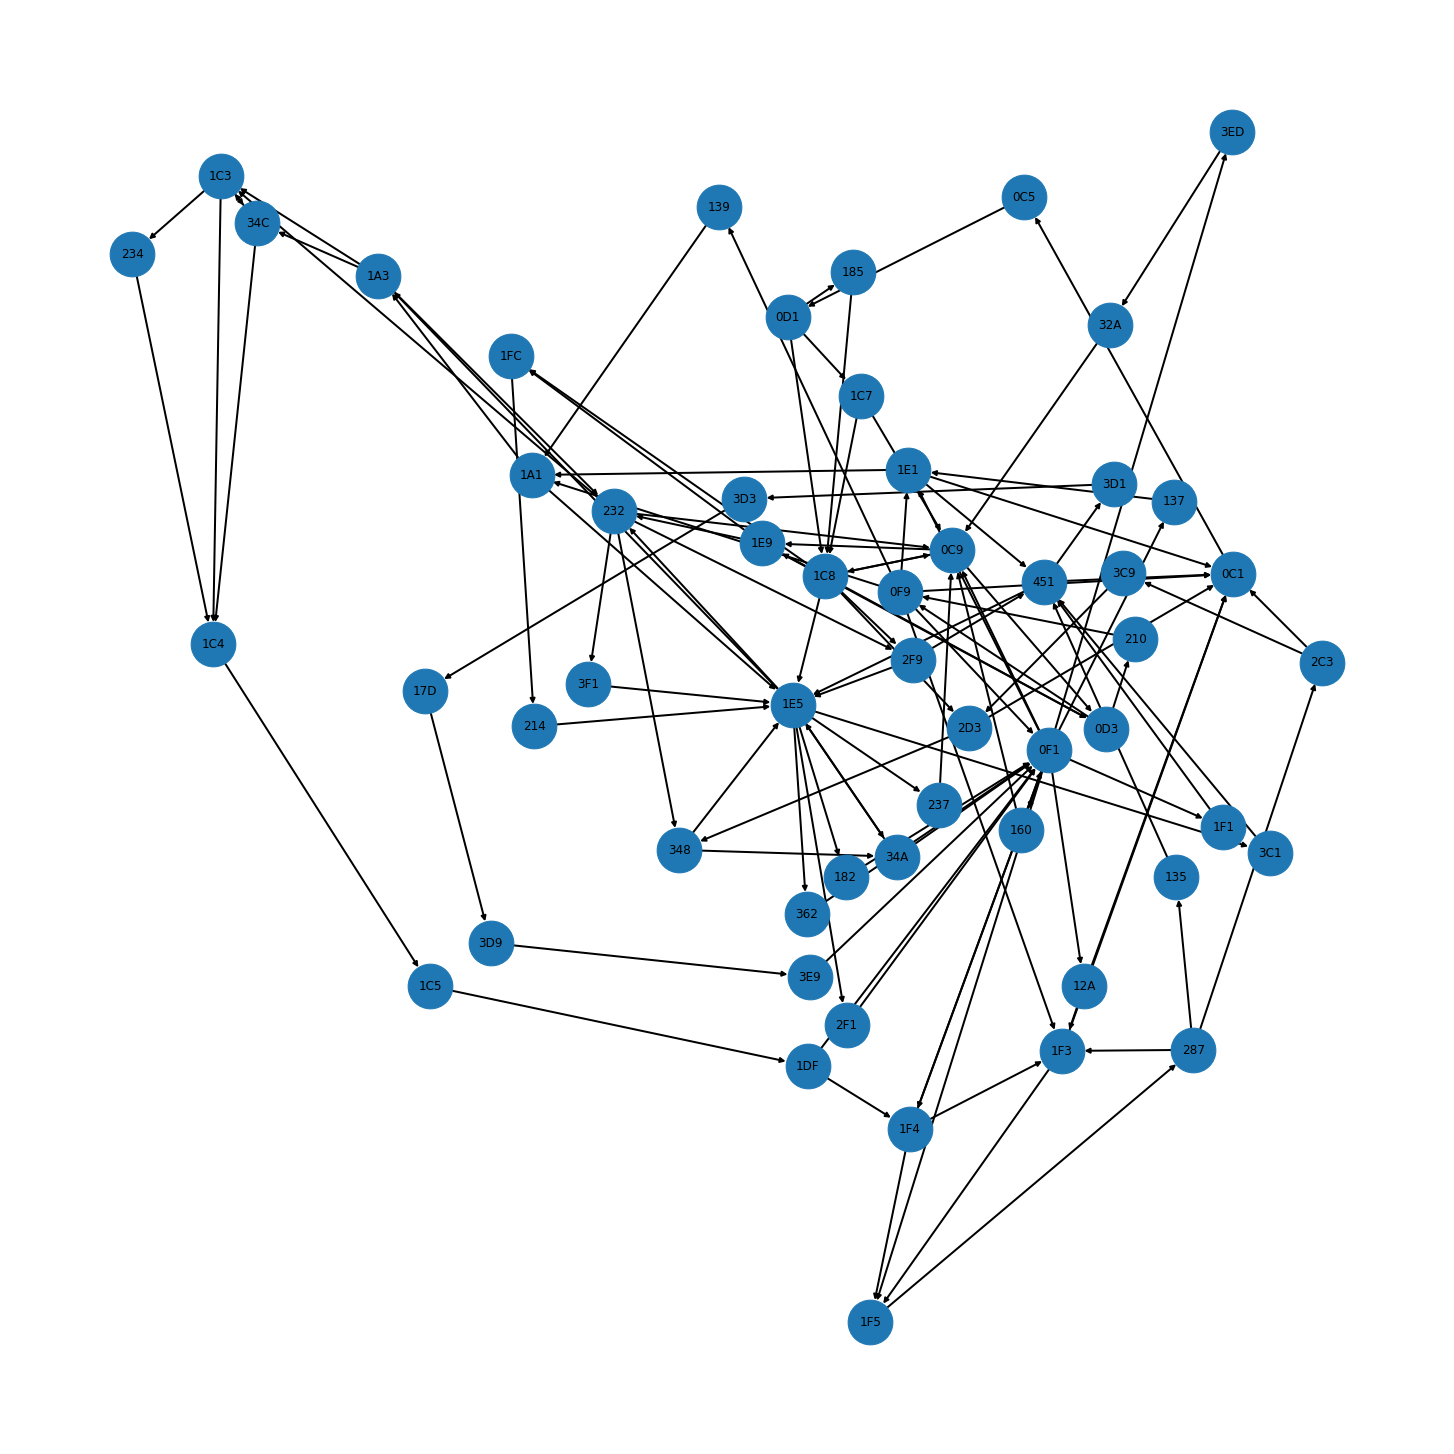

In [ ]:
plt.figure(figsize=(20,20))
pos = nx.spring_layout(G)
nx.draw(G, pos, node_size = 2000, with_labels= True, width = 2)
plt.savefig("graphdiagnostic.png", bbox_inches = "tight")
plt.savefig("graphdiagnostoc.pdf", bbox_inches = "tight")
plt.savefig("graphdiagnostic.svg", bbox_inches = "tight")

In [ ]:
for i in range (0,10):
  tim = ugltime[i][0]
  if tim == "(1536574931.814734)":
    print(tim)


(1536574931.814734)


In [ ]:
# for all graph








def fun1(filename):

  list1 = []

  file_ = open(filename, 'r')


  graphList = []
  ultimateGraphList = [] 
  graphCounter = 0
  linecoubter = 0
  while True: 
  
    # Get next line from file 
      line = file_.readline() 
      linecoubter += 1
      if not line: 
        break
      list1 = list(line.split())
      
      

      
    # if line is empty 
    # end of file is reached 
      node = list1[3][1:4]
      


      #print(node)
      graphList.append(node)
      #graphList.append(str(list1[2][0:3]))
      if len(graphList) == 200: #we take 200 messages so here 200
        ultimateGraphList.append(graphList)
        #print(graphList)
        graphList = []
  file_.close()
  print(linecoubter)
  ultimateGraphList.append(graphList)
  print(list1)
  return ultimateGraphList


ugl = fun1('/content/Attack_free_dataset.txt')

print(len(ugl))

2369399
['Timestamp:', '1037.590316', 'ID:', '0164', '000', 'DLC:', '8', '00', '08', '00', '00', '00', '00', '08', '00']
11847


In [ ]:
from collections import defaultdict
import networkx as nx
import matplotlib.pyplot as plt
G=nx.DiGraph()
lenugl = len(ugl)
fileW = open("attackfreeGraph100.txt", "w")


#fuzzy payload

# comparisonArray = [
# "(1536574999.332840)",
# "(1536574999.345715)",
# "(1536574999.357904)",
# "(1536574999.370267)",
# "(1536574999.382763)",		 
# "(1536574999.395621)",		
# "(1536574999.407952)",	
# "(1536574999.420428)",
# "(1536574999.432706)",
# "(1536574999.445787)"                   
# ]


#fuzzy_candid
# comparisonArray = [
# "(1536574998.963000)" ,
# "(1536575008.043000)" ,
# "(1536575036.002000)" ,
# "(1536575061.281000)" ,
# "(1536575081.616000)" ,
# "(1536575109.908500)" ,
# "(1536575133.263300)" ,
# "(1536575165.597000)" ,
# "(1536575181.757100)",
# "(1536575200.992100)"              

# ]

# diagnostic log
# comparisonArray = [
# "(1536574990.376800)",
# "(1536575011.999470)", 
# "(1536575046.773440)",
# "(1536575068.585620)", 
# "(1536575088.579160)", 
# "(1536575113.381390)", 
# "(1536575150.181100)", 
# "(1536575168.015200)", 
# "(1536575180.287600)", 
# "(1536575202.315100)",
# ]


counter = 0
for i in range(0,lenugl):
  fileW.write("Graph No: "+str(i+1))
  fileW.write("\n")
  dicGraph = defaultdict(list)
  attack = True
    

  for j in range (0, len(ugl[i])-1):
    dicGraph[str(ugl[i][j])].append((ugl[i][j+1]))
   
  fileW.write("Attack Free: "+str(attack)+"\n")   
  for key, val in dicGraph.items():
    fileW.write(str(key) + (" ---> "))
    # fileW.write("\n")
    for m in range(0, len(val)):
      fileW.write(val[m]+"\t")
    fileW.write("\n")


print(counter)

fileW.close()


0
